In [1]:
# import modules
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

# Import DataFrames

In [2]:
# get raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.head()

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [3]:
# get lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(5)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
1474,PE O-36:1 (LPE p),PE O,36,1
4527,DAG 34:2+NH4 (-FA 18:2 (NH4)),DAG,34,2
3635,"HexCer 44:3;2 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",HexCer,44,3
2613,PC O-42:4 (PC),PC O,42,4
3777,"GM1 40:0;3 (LCB 18:1;2-2H2O,LCB 18:0;3-3H2O)",GM1,40,0


In [4]:
# get experiment metadata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.sample(5)

,Exp,Mutation
18,CERS2-1g_B,CERS2-1g
15,CERS2_mg-B.1,CERS2_mg
33,SPTLC_B.1,SPTLC
8,CAVIN_A,CAVIN
7,CAV_B.1,CAV


# Principal Components Analysis (Transposed)

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
# drop the blank columns and transpose dataframe
samples = df["Sample Name"]
df_dropped = df.drop(["Sample Name", "RAJU-Blank", "RAJU-Blank.1"], axis=1)

df_dropped = df_dropped.T
exps = df_dropped.index

x = df_dropped.values

# for each column, standardize the values
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

((40, 6278), 4.4408920985006264e-17, 1.0)

In [7]:
# create dataframe with standardized values
df_standardized = pd.DataFrame(x, columns=samples)
df_standardized = df_standardized.set_index(exps)
df_standardized.head(10)

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
CAS9-A,-0.119632,1.767019,-1.638565,0.206113,1.929826,0.169306,2.227004,0.471287,0.400821,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-A.1,-0.553561,1.746037,-2.330926,-0.207008,1.015202,0.228176,-0.659004,-0.757276,-0.763288,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B,-0.879008,1.477073,-0.646596,-0.679147,2.686101,2.670966,-0.659004,0.207133,1.172339,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B.1,-0.752445,2.935033,-2.387777,-0.384060,1.846445,0.127014,2.050161,-0.757276,1.298701,2.624122,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAV_A,-0.036297,0.472543,1.686503,1.386459,-1.123793,0.761665,-0.659004,-0.757276,1.040952,-0.494894,...,3.019255,2.518582,2.754141,3.625649,1.846327,0.151630,2.785081,-0.100456,0.801032,1.933684
CAV_A.1,0.167859,0.239604,1.467892,0.796286,0.593356,0.310385,-0.659004,-0.757276,0.783203,1.409335,...,2.669112,3.887279,2.924216,-0.350245,-0.484760,0.452383,1.882117,0.634059,0.964328,2.275976
CAV_B,-0.969410,-0.468710,0.282205,2.008153,-0.224321,-0.329849,2.049686,-0.757276,-0.763288,-0.494894,...,1.531147,2.266454,2.860438,2.964777,1.740368,2.106525,-0.318859,0.979713,0.650977,1.529318
CAV_B.1,-0.969410,0.290974,0.671246,2.256143,-0.559827,1.425733,0.806763,-0.757276,-0.763288,-0.494894,...,1.239361,1.582106,2.924216,3.316531,1.263555,2.557654,-0.318859,0.893300,0.425893,1.430000
CAVIN_A,1.947901,-0.928126,0.777443,1.150389,-0.557601,0.745717,-0.659004,-0.757276,1.040952,0.929145,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAVIN_A.1,0.193994,-0.226649,-0.553325,0.029061,-0.563991,-0.949952,0.258598,1.358562,1.291696,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,1.210576,1.003763,2.446470,1.238954,-0.593602,1.779386


In [8]:
# do PCA
from sklearn.decomposition import PCA
pca_lipids = PCA(n_components=10)
principal_components = pca_lipids.fit_transform(x)

In [9]:
# create df with pca values

# create list of columns
pcs = []
for i in range(1,11):
    pcs.append('principal component ' + str(i))
# print(pcs)

# create df
df_pca = pd.DataFrame(principal_components, columns=pcs)
df_pca["Exp"] = exps
df_pca = df_pca.merge(df_exps, on='Exp')
df_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Exp,Mutation
0,42.527814,-16.683367,45.540851,-15.927920,-17.889349,-0.891699,7.849688,-2.577079,-0.233067,16.452987,CAS9-A,CAS9
1,44.598359,-15.268545,43.056894,-16.501488,-10.271197,-3.091495,13.085497,-5.356799,64.792691,-0.110927,CAS9-A.1,CAS9
2,47.996701,-18.515051,39.706015,-38.089758,-23.548462,-0.080648,-1.118393,-2.076576,-41.833112,-9.384907,CAS9-B,CAS9
3,34.158887,-13.786953,27.394578,-26.244539,-13.409225,-5.289445,-0.265993,-1.768978,-17.734734,-1.798223,CAS9-B.1,CAS9
4,-13.678171,-12.921695,-8.420310,-3.654443,-10.151503,30.796534,-24.835960,18.107065,4.693602,-4.945365,CAV_A,CAV
5,-16.081464,-13.525604,-8.646152,-1.208610,-9.635730,30.039954,-22.988336,10.948536,5.453087,-3.335462,CAV_A.1,CAV
6,-18.948359,-44.324279,24.150665,53.649292,-0.614155,27.211136,12.085787,-16.971314,-4.962003,0.048574,CAV_B,CAV
7,-18.620909,-44.649314,22.075455,51.305172,-1.049279,26.047413,11.363310,-5.819511,-8.679332,1.044804,CAV_B.1,CAV
8,10.886078,13.385611,-1.926107,-0.260552,-4.098583,20.365647,-16.948546,2.536287,7.416258,0.963557,CAVIN_A,CAVIN
9,10.244572,11.675219,-3.987473,2.159464,0.357948,18.282327,-18.350967,1.794117,2.170046,8.704622,CAVIN_A.1,CAVIN


Explained variation per principal component: [0.11988295 0.0835215  0.07443767 0.05976046 0.05282209 0.04188166
 0.03515153 0.02903903 0.02724031 0.02664577]


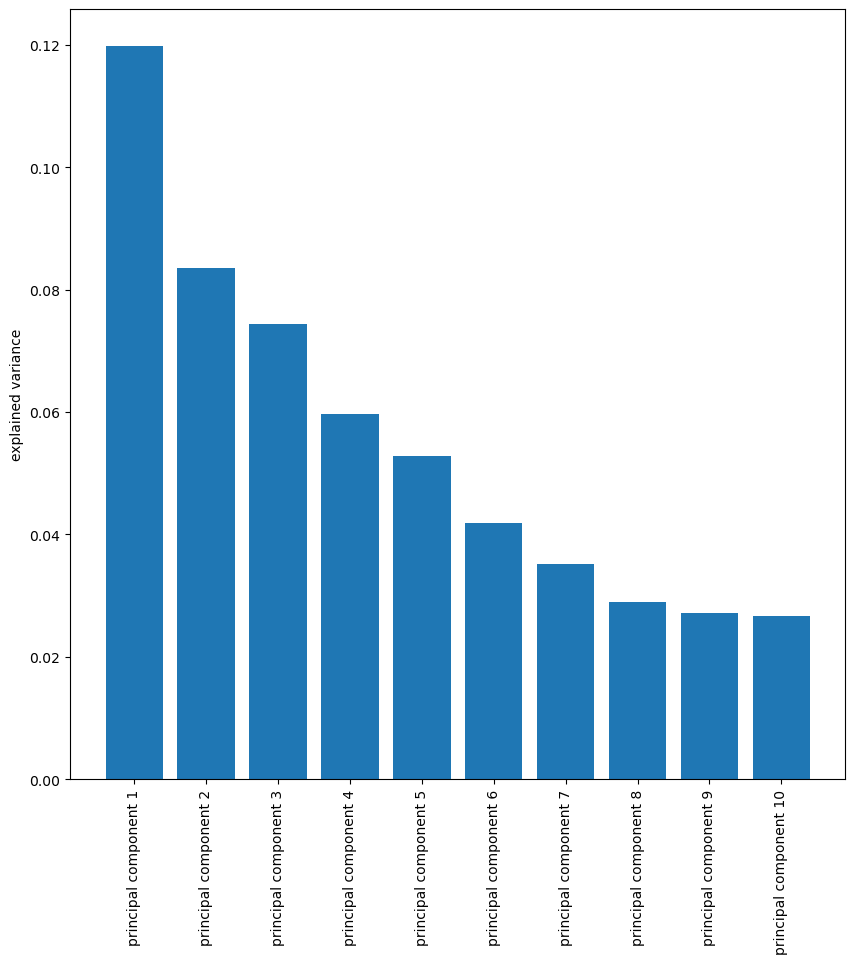

In [10]:
# find explained variance
explained_variance = pca_lipids.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))

plt.figure(figsize=(10,10))
plt.bar(
    x=pcs,
    height=explained_variance
)
plt.ylabel('explained variance')
plt.xticks(rotation=90)
plt.show()

In [11]:
# which features contribute to the components. it has shape (n_components, n_features)
components_df = pd.DataFrame(pca_lipids.components_, columns=samples, index=pcs)
components_df

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
principal component 1,0.011746,0.011020,-0.005854,0.002112,0.017085,0.007723,-0.004354,-0.012482,-0.007667,-0.003819,...,-0.013446,-0.008302,-0.008111,-0.007500,0.002719,0.003766,-0.004734,0.013101,0.015112,0.004199
principal component 2,0.012394,0.001071,0.001467,-0.013524,-0.010593,-0.014120,-0.010573,0.020847,0.019627,0.007605,...,0.006621,-0.017720,-0.019591,-0.019777,-0.010162,-0.008482,0.003968,0.001828,0.005181,-0.000211
principal component 3,-0.029059,0.029037,-0.029357,-0.000740,0.022879,0.018977,0.026312,0.011010,0.018243,0.002347,...,0.017687,0.001802,0.005041,0.006366,-0.002090,0.000787,0.007097,-0.007151,-0.009429,-0.000829
principal component 4,0.004660,-0.008478,0.010946,0.026040,-0.014052,0.007262,0.010372,-0.012839,-0.009586,-0.003504,...,0.013618,0.022007,0.025206,0.028514,0.030249,0.038069,0.002728,0.031511,0.027079,0.026014
principal component 5,-0.024544,-0.006527,-0.007751,-0.010625,0.013950,0.007403,0.009157,0.003988,-0.013335,-0.017021,...,0.004555,-0.009692,-0.006822,-0.006551,0.000477,0.005622,0.007008,0.012675,0.015121,0.007890
principal component 6,0.009846,-0.003684,0.018096,0.012679,-0.010789,-0.011303,-0.013349,0.003219,0.012320,-0.003294,...,0.029665,0.022423,0.030234,0.021750,0.002109,0.007898,0.013154,0.003823,0.006128,0.024626
principal component 7,0.001659,-0.015105,-0.015018,-0.011178,-0.008181,-0.012048,-0.000168,0.007765,-0.007427,-0.012021,...,-0.018572,-0.009080,-0.006454,0.000870,0.008316,0.009282,-0.029783,0.008644,0.007680,-0.007625
principal component 8,-0.001569,-0.004219,-0.009341,-0.007531,0.007712,0.017766,-0.001248,-0.012345,-0.002892,-0.007599,...,0.006277,0.007301,0.004071,0.000159,-0.001723,-0.003206,0.028091,-0.004202,-0.002292,0.002245
principal component 9,0.007034,-0.002095,-0.011190,-0.001474,-0.015146,-0.016430,-0.011755,-0.009825,-0.013836,-0.006439,...,-0.000326,0.001360,-0.001321,-0.004245,-0.002781,-0.008953,0.000346,-0.007727,-0.007052,-0.003182
principal component 10,0.003319,-0.001280,-0.001713,0.006347,0.010703,-0.004108,0.015504,0.002099,-0.003916,0.031504,...,-0.009039,-0.007431,-0.005989,-0.004738,-0.002928,0.007023,0.037794,0.007522,0.004271,0.011682


# Graph PCA (Transposed)

In [12]:
import altair as alt

In [13]:
# chart principal components
click = alt.selection_point(fields=['Mutation'])

pca= alt.Chart(df_pca).mark_point().encode(
    x='principal component 1:Q',
    y='principal component 2:Q',
    color=alt.condition(click, 'Mutation:N', alt.value('lightgray')),
    tooltip=['Exp', 'Mutation']
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
).add_params(
    click
)

pca

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# Confidence Ellipse

In [14]:
# add confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

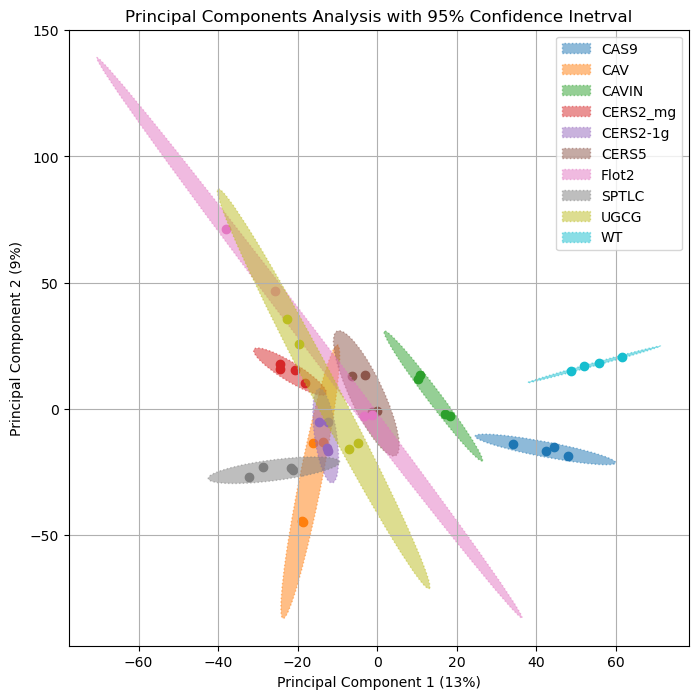

In [25]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(8,8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Inetrval')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_confidence_ellipse.jpg', dpi=300)

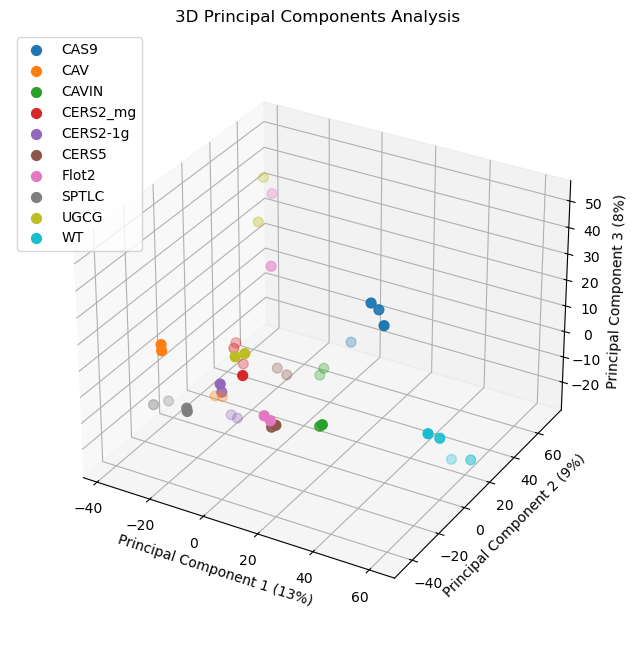

In [42]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    z = df_pca[df_pca['Mutation'] == protein]['principal component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(loc='upper left')
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
ax_nstd.set_zlabel('Principal Component 3 (8%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_3d.jpg', dpi=300)

# Save Chart

In [ ]:
# save chart to html
# pca.save('graphs/pos_mode_whole_dataset/pca-transposed.html')